## Problem set 3

**Problem 0** (-2 points for every missing green OK sign. If you don't run the cell below, that's -14 points.)

Make sure you are in the DATA1030 environment.

In [4]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.7":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.7":
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.18.5", 'matplotlib': "3.2.2",'sklearn': "0.23.1", 
                'pandas': "1.0.5",'xgboost': "1.1.1", 'shap': "0.35.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:33:30) 
[Clang 9.0.1 ]

[ OK ] numpy version 1.18.5 is installed.
[ OK ] matplotlib version 3.2.2 is installed.
[ OK ] sklearn version 0.23.1 is installed.
[ OK ] pandas version 1.0.5 is installed.
[ OK ] xgboost version 1.1.1 is installed.
[ OK ] shap version 0.35.0 is installed.


**Problem 1: Diabetes dataset**

Carefully read the description of the [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) which you can [load](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) from sklearn directly. Make sure to load the data as pandas dataframes or series.


**Problem 1a** (10 points)

Go through each column in the dataset (including the target variable) and decide if the column is continuous or categorical and apply the `describe` or `value_counts` methods as appropriate. Prepare a bar plot or a histogram for each column as appropriate. Make sure that the axes are labelled and experiment a bit with `bins` if you use a histogram.

Grading suggestion:
- 1 point for correctly reading in the data into pandas
- 2 points if they figure out that the sex is categorical but the other columns are continuous
- 2 points if they correctly use .describe and .value_counts
- 2 point if the correct figure type is used for each column,
- 2 points if axes are correctly labelled 
- 1 point if they use something else than the default bins=10 (bins=20 or int(np.sqrt(X.shape[0])) or something similar are good)


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
214
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64


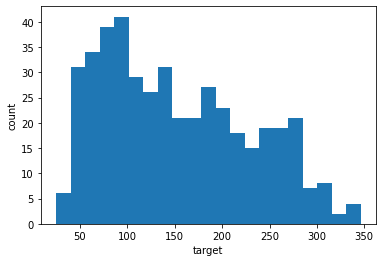

age
count    4.420000e+02
mean    -3.639623e-16
std      4.761905e-02
min     -1.072256e-01
25%     -3.729927e-02
50%      5.383060e-03
75%      3.807591e-02
max      1.107267e-01
Name: age, dtype: float64


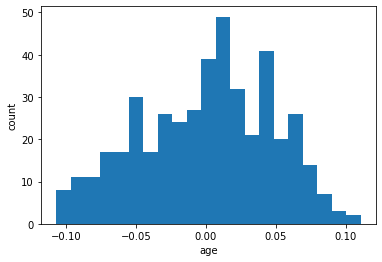

sex
-0.044642    235
 0.050680    207
Name: sex, dtype: int64


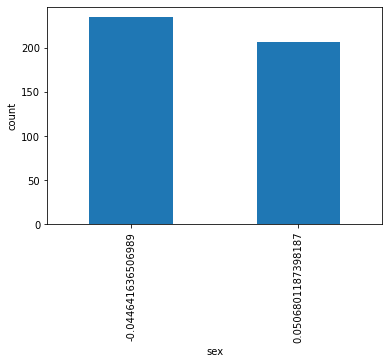

bmi
count    4.420000e+02
mean    -8.013951e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: bmi, dtype: float64


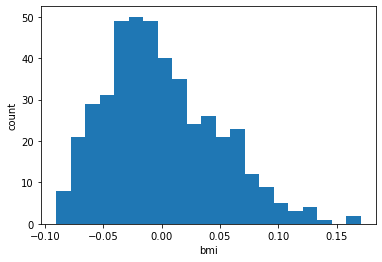

bp
count    4.420000e+02
mean     1.289818e-16
std      4.761905e-02
min     -1.123996e-01
25%     -3.665645e-02
50%     -5.670611e-03
75%      3.564384e-02
max      1.320442e-01
Name: bp, dtype: float64


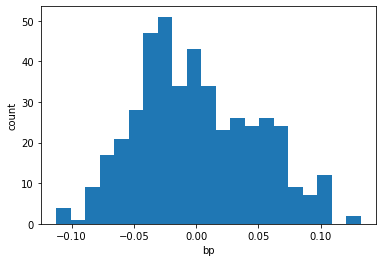

s1
count    4.420000e+02
mean    -9.042540e-17
std      4.761905e-02
min     -1.267807e-01
25%     -3.424784e-02
50%     -4.320866e-03
75%      2.835801e-02
max      1.539137e-01
Name: s1, dtype: float64


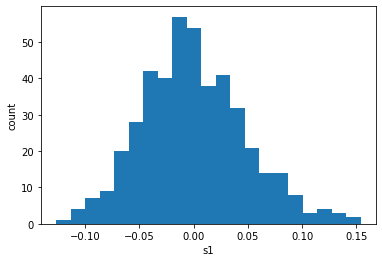

s2
count    4.420000e+02
mean     1.301121e-16
std      4.761905e-02
min     -1.156131e-01
25%     -3.035840e-02
50%     -3.819065e-03
75%      2.984439e-02
max      1.987880e-01
Name: s2, dtype: float64


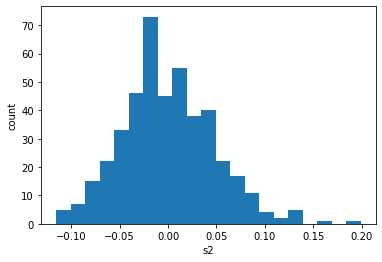

s3
count    4.420000e+02
mean    -4.563971e-16
std      4.761905e-02
min     -1.023071e-01
25%     -3.511716e-02
50%     -6.584468e-03
75%      2.931150e-02
max      1.811791e-01
Name: s3, dtype: float64


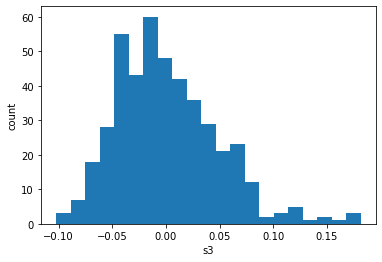

s4
count    4.420000e+02
mean     3.863174e-16
std      4.761905e-02
min     -7.639450e-02
25%     -3.949338e-02
50%     -2.592262e-03
75%      3.430886e-02
max      1.852344e-01
Name: s4, dtype: float64


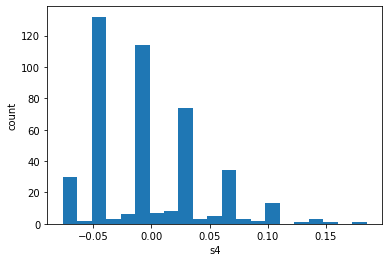

s5
count    4.420000e+02
mean    -3.848103e-16
std      4.761905e-02
min     -1.260974e-01
25%     -3.324879e-02
50%     -1.947634e-03
75%      3.243323e-02
max      1.335990e-01
Name: s5, dtype: float64


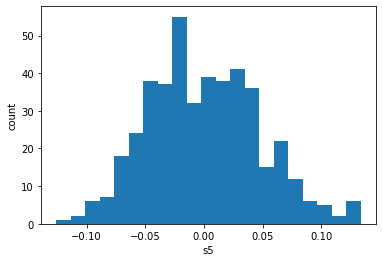

s6
count    4.420000e+02
mean    -3.398488e-16
std      4.761905e-02
min     -1.377672e-01
25%     -3.317903e-02
50%     -1.077698e-03
75%      2.791705e-02
max      1.356118e-01
Name: s6, dtype: float64


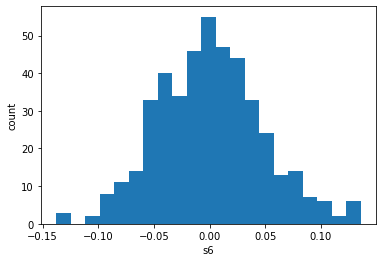

In [5]:
from sklearn.datasets import load_diabetes
import pandas as pd
from matplotlib import pylab as plt
import numpy as np

X, y = load_diabetes(return_X_y=True,as_frame=True)

print(X.head())
cols = X.columns

# the target variable
print(y.nunique()) # it is continuous
print(y.describe())
y.plot.hist(bins = int(np.sqrt(X.shape[0])) )   
plt.xlabel(y.name)
plt.ylabel('count')
plt.show()

# loop through each feature in the feature matrix
for col in cols:
    print(col) 
    if X[col].nunique() < 3: # the number of unique values in each column
        # categorical feature
        print(X[col].value_counts())
        pd.value_counts(X[col]).plot.bar()
        plt.ylabel('count')
        plt.xlabel(col)
        plt.show()
        
    else:
        # continous feature
        print(X[col].describe())
        X[col].plot.hist(bins = int(np.sqrt(X.shape[0])) )   
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

**Problem 1b** (15 points)

Prepare the figure types as indicated in the cells below. For each figure type, select two appropriate columns from the diabetes dataset, make sure the axes are labelled and use legends if appropriate.

Write figure captions for each figure (a couple of sentences for each figure)! A good figure caption first describes what's shown on the x and y axes and explains the legends if appropriate. The next couple of sentences explains to the reader what the figure actually shows and what conclusions or insights can be drawn from the figure. 

If you think that a visualization type cannot be prepared using this dataset, explain why.

Grading suggestion:

- 1 point per figure if the correct features were used
- 1 point per figure if axes are labelled and there is a legend if appropriate
- 1 point per figure if the caption describes the axes and legend
- 1 point per figure if the caption describes what the figure shows

- 3 points for realizing that we can't make a stacked bar plot because this dataset has only one categorical feature but we need two categorical features for a stacked bar plot.


**Scatter plot**

**Violin plot**

**Stacked bar plot**

**Category-specific histogram**

**Problem 2** (10 points)

Carefully read the [description](https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures#) of the hand postures dataset. The dataset is in the `data` folder of your repo. Read the data into a pandas dataframe and answer the questions below.

Grading suggestion:

- 2 points if they read the file in correctly and drop the initial dummy record
- 2 points for each question correctly answered


In [2]:
import pandas as pd
df = pd.read_csv('data/Postures.csv')
df.drop([0],inplace=True)
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,?,?,?,?,?,?,?,?,?,?


Q1: How many unique users do we have and how many recorded postures per user?

In [7]:
users = df['User'].unique()

for user in users:
    print('user:',user,', nr recorded postures:', df[df['User']==user].shape[0])

user: 0 , nr recorded postures: 9048
user: 1 , nr recorded postures: 4717
user: 2 , nr recorded postures: 4513
user: 4 , nr recorded postures: 379
user: 5 , nr recorded postures: 5105
user: 6 , nr recorded postures: 4377
user: 7 , nr recorded postures: 492
user: 8 , nr recorded postures: 6811
user: 9 , nr recorded postures: 3920
user: 10 , nr recorded postures: 9573
user: 11 , nr recorded postures: 8061
user: 12 , nr recorded postures: 4865
user: 13 , nr recorded postures: 8739
user: 14 , nr recorded postures: 7495


Q2: How many times each posture was recorded for each user? Was each posture recorded at least once for each user?

In [8]:
count_matrix = df.groupby(['User', 'Class']).size().unstack()
print(count_matrix)
# no, posture 5 ('grab') was not recorded for users 4 and 7.

Class       1       2       3       4       5
User                                         
0      1872.0  1501.0  1851.0  1781.0  2043.0
1      1307.0   796.0   968.0   561.0  1085.0
2      1198.0   808.0   721.0   677.0  1109.0
4        29.0    71.0   131.0   148.0     NaN
5       820.0  1143.0   926.0  1033.0  1183.0
6       738.0   962.0   779.0   744.0  1154.0
7        84.0   124.0   134.0   150.0     NaN
8      1097.0  1392.0  1670.0  1160.0  1492.0
9       653.0   918.0   676.0   832.0   841.0
10     2397.0  1481.0  2108.0  1894.0  1693.0
11     1604.0  1380.0  1601.0  1881.0  1595.0
12      712.0   941.0  1087.0  1212.0   913.0
13     2107.0  1671.0  1672.0  1771.0  1518.0
14     1647.0  1790.0  2020.0   931.0  1107.0


Q3: Note in the description that 11 markers were attached to the glove of the users and the (x,y,z) coordinates of each marker are the features of the dataset (11*3 = 33 features plus user ID and class). Some markers could be invisible (e.g., markers hidden inside a fist) so the dataset contains a lot of missing values represented as '?'. Create a new feature which describes for each row in the dataset how many visible markers we have data on. Add this column to the dataframe and print out the head and the tail of the new dataframe.

Hints:
- first replace '?' with np.nan using the .replace method of dataframes
- look up the .isnull() method to figure out which elements in the dataframe are NaNs.

In [9]:
df.replace('?',np.nan,inplace=True)

mask = df.isnull()
missing_cols = mask.sum(axis=1)

df['visible markers'] = 11 - missing_cols/3

print(df.head())
print(df.tail())

   Class  User         X0         Y0         Z0         X1         Y1  \
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   
5      1     0  55.142401  71.435607 -64.177303  36.175818  81.556874   

          Z1         X2         Y2  ...   X9   Y9   Z9  X10  Y10  Z10  X11  \
1 -72.780545  36.621229  81.680557  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2 -49.596509  79.223743  43.254091  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3 -50.606259  78.451526  43.567403  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4 -52.752784  86.320630  68.214645  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5 -53.475747  76.986143  42.426849  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   Y11  Z11 visible markers  
1  NaN  NaN             4.0  
2  NaN  NaN             4.0  
3 

Q4: Create a bar plot which shows the number of visible markers on the x axis and how many postures were observed with a given number of visible markers on the y axis.

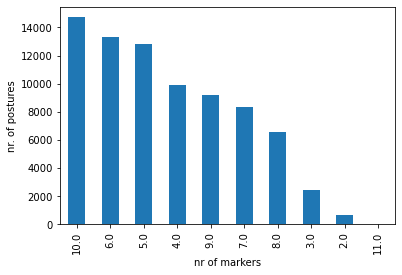

In [10]:
pd.value_counts(df['visible markers']).plot.bar()
plt.ylabel('nr. of postures')
plt.xlabel('nr of markers')
plt.show()